#Titanic Kaggle Competition

Target variable -> Survived


In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


#Imports

In [2]:
#Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

#Train,Test,Split
from sklearn.model_selection import train_test_split

#Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  #gradient boost architecture
from xgboost import XGBRFClassifier #random forest architecture
from catboost import CatBoostClassifier

#Optimizers
from sklearn.model_selection import cross_val_score #KFold  K=10
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix

#Checking the data

In [3]:
dataset= pd.read_csv("train.csv")

print(dataset.columns)
dataset.head(10)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Moving target column - 'Survived' - to the last column

In [4]:
dataset= dataset[['Embarked','PassengerId','Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Fare','Age', 'Cabin','Survived']]

In [5]:
dataset.head()

,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Survived
0,S,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,22.0,NaN,0
1,C,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,38.0,C85,1
2,S,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,26.0,NaN,1
3,S,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,35.0,C123,1
4,S,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,35.0,NaN,0


In [6]:
dataset.shape  #891 rows

(891, 12)

In [7]:
dataset.describe()

,PassengerId,Pclass,SibSp,Parch,Fare,Age,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,2.308642,0.523008,0.381594,32.204208,29.699118,0.383838
std,257.353842,0.836071,1.102743,0.806057,49.693429,14.526497,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,2.000000,0.000000,0.000000,7.910400,20.125000,0.000000
50%,446.000000,3.000000,0.000000,0.000000,14.454200,28.000000,0.000000
75%,668.500000,3.000000,1.000000,0.000000,31.000000,38.000000,1.000000
max,891.000000,3.000000,8.000000,6.000000,512.329200,80.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Embarked     889 non-null    object 
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Age          714 non-null    float64
 10  Cabin        204 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Checking NaNs

In [9]:
dataset.isna().sum()  #Age, Cabin and Embarked have NaNs

Embarked         2
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Age            177
Cabin          687
Survived         0
dtype: int64

In [10]:
print(dataset.isna().sum()['Age']/891)  #  19,86% NaNs values to Age feature

0.19865319865319866


In [11]:
print(dataset.isna().sum()['Cabin']/891)  #  77,10% NaNs values to Cabin feature | The main idea was the enhance the quality of the data, once we have more than 50% in NaNs, however I might try using another approach to solve NaNs. (mean,median)

0.7710437710437711


In [12]:
print(dataset.isna().sum()['Embarked']/891)#  0,2% NaNs values to Embarked feature

0.002244668911335578


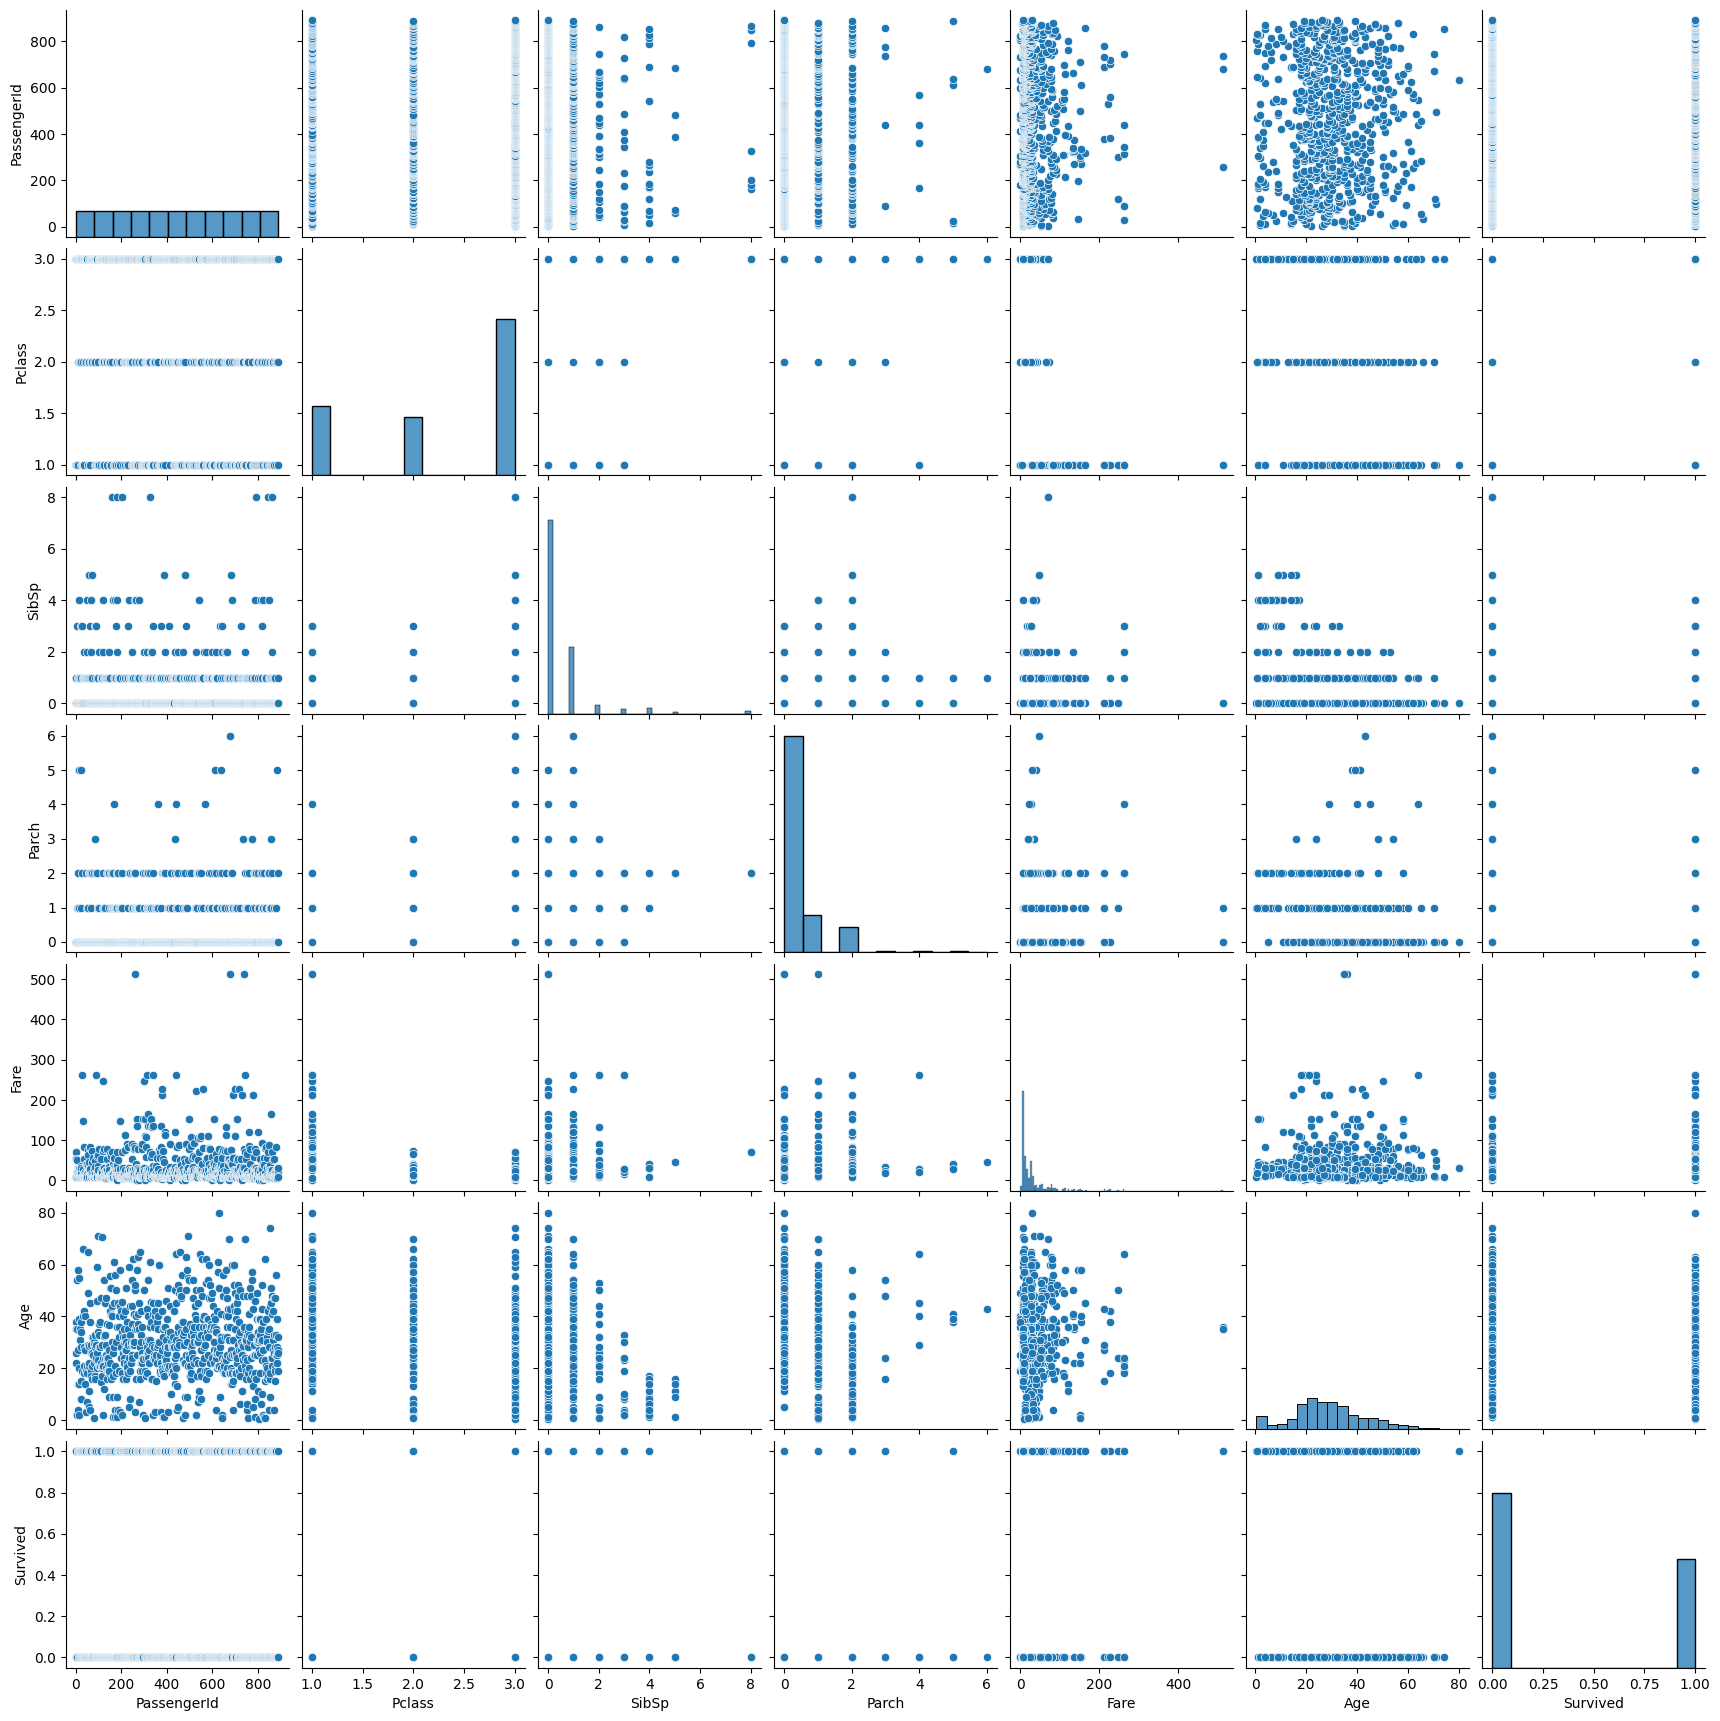

In [13]:
sns.pairplot(dataset)

#Insights from seaborn pairplot vision

Feature 'Name' does not have any impact, and also we can track the 'person' by the Passenger Id, so we'll drop it from the data frame.

In [14]:
dataset.drop('Name',axis=1,inplace=True)

In [15]:
dataset

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Survived
0,S,1,3,male,1,0,A/5 21171,7.2500,22.0,NaN,0
1,C,2,1,female,1,0,PC 17599,71.2833,38.0,C85,1
2,S,3,3,female,0,0,STON/O2. 3101282,7.9250,26.0,NaN,1
3,S,4,1,female,1,0,113803,53.1000,35.0,C123,1
4,S,5,3,male,0,0,373450,8.0500,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
886,S,887,2,male,0,0,211536,13.0000,27.0,NaN,0
887,S,888,1,female,0,0,112053,30.0000,19.0,B42,1
888,S,889,3,female,1,2,W./C. 6607,23.4500,NaN,NaN,0
889,C,890,1,male,0,0,111369,30.0000,26.0,C148,1


#Checking unique values

In [16]:
np.unique(dataset['Survived'],return_counts=True) # 38% difference between non survived and survived | Maybe oversampling might help in the results- 50%-50%   APLLY LABEL ENCODER!

(array([0, 1]), array([549, 342]))

In [17]:
np.unique(dataset['Parch'],return_counts=True) # 38% difference between non survived and survived | Maybe oversampling might help in the results- 50%-50%   APLLY LABEL ENCODER!

(array([0, 1, 2, 3, 4, 5, 6]), array([678, 118,  80,   5,   4,   5,   1]))

In [18]:
dataset['Cabin'].unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [19]:
#Checking Embarked unique values--> Need to change for str type  (from object to str)
dataset['Embarked']=dataset['Embarked'].astype(str)

#Brainstorm

Correlation matrix to see any blindspots

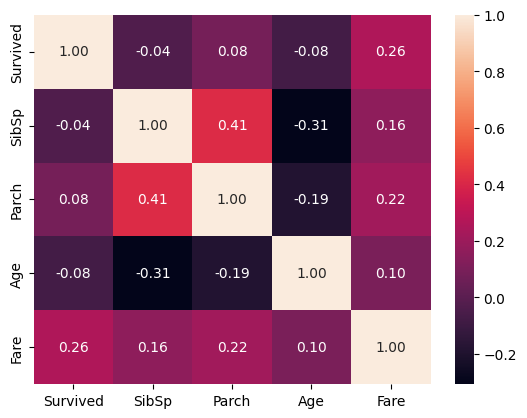

In [20]:
cm = sns.heatmap(dataset[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = 'rocket')

In [21]:
#Parch - SibSp   0.41
# Fare - Survived 0.26

Plots to analyze any trend and correlation

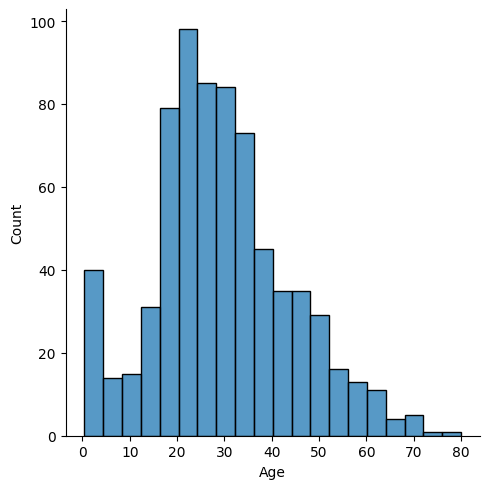

In [22]:
sns.displot(data=dataset['Age'])

In [23]:
dataset.columns

Index(['Embarked', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Age', 'Cabin', 'Survived'],
      dtype='object')

In [24]:
px.bar(x=dataset.Sex,y=dataset.Survived)

Male vs Female Survived and non survived stats

In [25]:
dataset.loc[dataset['Sex']=='male']['Survived'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [26]:
dataset.loc[dataset['Sex']=='female']['Survived'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [27]:
dataset.head(10)

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin,Survived
0,S,1,3,male,1,0,A/5 21171,7.2500,22.0,NaN,0
1,C,2,1,female,1,0,PC 17599,71.2833,38.0,C85,1
2,S,3,3,female,0,0,STON/O2. 3101282,7.9250,26.0,NaN,1
3,S,4,1,female,1,0,113803,53.1000,35.0,C123,1
4,S,5,3,male,0,0,373450,8.0500,35.0,NaN,0
5,Q,6,3,male,0,0,330877,8.4583,NaN,NaN,0
6,S,7,1,male,0,0,17463,51.8625,54.0,E46,0
7,S,8,3,male,3,1,349909,21.0750,2.0,NaN,0
8,S,9,3,female,0,2,347742,11.1333,27.0,NaN,1
9,C,10,2,female,1,0,237736,30.0708,14.0,NaN,1


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Embarked     891 non-null    object 
 1   PassengerId  891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Age          714 non-null    float64
 9   Cabin        204 non-null    object 
 10  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Analyzing Embarked Feature

In [29]:
np.unique(dataset['Embarked'],return_counts=True)

(array(['C', 'Q', 'S', 'nan'], dtype=object), array([168,  77, 644,   2]))

In [30]:
ds=px.bar(x=dataset.Sex,y=dataset.Survived,color=dataset['Embarked'],title='Survival by Port of Embarkation')

ds.update_layout(xaxis_title='Survivors per Sex',
                 yaxis_title='Number of survivors')

Embarkation NaN - female passenger - 2 cases

Replacing nan using 'S' the most commom embarkation

In [31]:
dataset['Embarked'].isna().any()

False

Survival by Port of embarkation

S = Southampton (UK)

C = Cherbourg  (France)

Q = Queenstown  (New Zealand)



Analyzing the Cabin feature

In [32]:
dataset['Cabin']=dataset['Cabin'].astype(str)

In [33]:
np.unique(dataset['Cabin'],return_counts=True)

(array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
        'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
        'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
        'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
        'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
        'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
        'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
        'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
        'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
        'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
        'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
        'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
        'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
        'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',

We do not know the ship architecture, so maybe we can summary A1,A2,A3...An to A, and so on for the other lethers.
That way, we can encode this feature

Analyzing ID per Embarkation, to see if there is anything explaining the fact that the majority of survivors is from Embarkation UK

In [34]:
ds=px.bar(x=dataset.Embarked,y=dataset.PassengerId,color=dataset['Sex'],title='Passenger Id per Embarkation and Sex')

ds.update_layout(xaxis_title='Port of Embarkation',
                 yaxis_title='Number of people')

In [35]:
ds=px.bar(x=dataset.Embarked,y=dataset.PassengerId,title='Passenger Id per Embarkation and Sex')

ds.update_layout(xaxis_title='Port of Embarkation',
                 yaxis_title='Number of people')

In [36]:
ds=px.bar(x=dataset.Pclass,y=dataset.PassengerId,title='Passenger Id per Class')

ds.update_layout(xaxis_title='Class',
                 yaxis_title='Number of people')

In [37]:
ds=px.bar(x=dataset.Pclass,y=dataset.PassengerId,title='Passenger Id per Class',color=dataset.Survived)

ds.update_layout(xaxis_title='Class',
                 yaxis_title='Number of people')

Maybe we can using oversampling to achieve better results in the feature : Fare,Parch, SibSpp

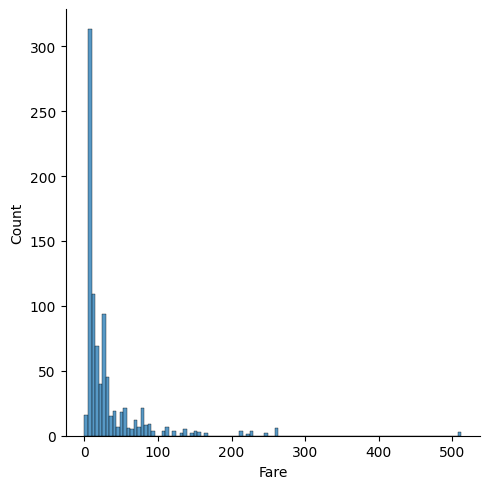

In [38]:
sns.displot(dataset.Fare,kind='hist')

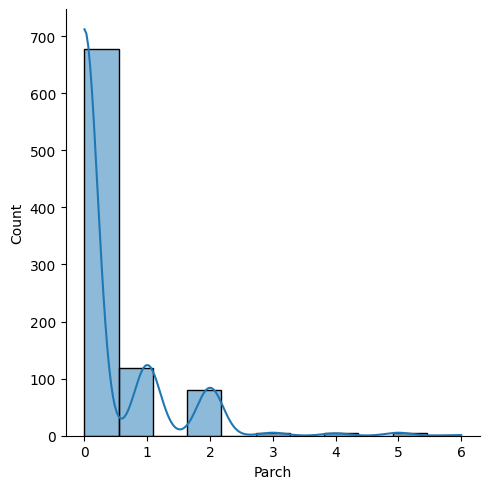

In [39]:
sns.displot(dataset.Parch,kind='hist',kde=True)

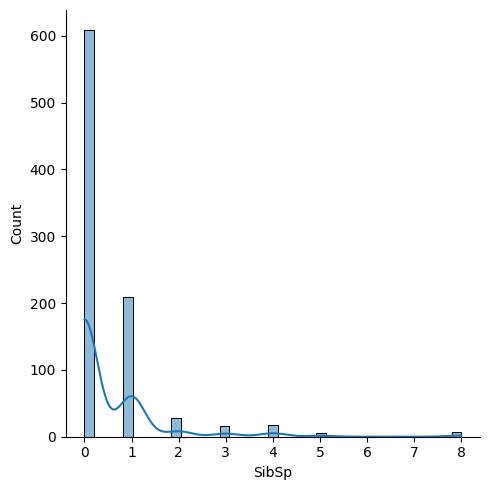

In [40]:
sns.displot(dataset.SibSp,kind='hist',kde=True)

#Drop Columns


Removing Cabin and Ticket column from the dataset. Number of the NaNs values is nearly 80% of the dataset rows. The best approach is to generate new quality data, but to keep the initial conditions from the kaggle challenge, I'll drop it from the dataset, considering it's information not reliable. We could have a nice insight regarding the cabin vs survival, once the ship cabin architecture benefits the high payers.

In [41]:
dataset.drop(columns=['Cabin','Ticket'],inplace=True,axis=1)

Label Encoder

In [42]:
le=LabelEncoder()

In [43]:
dataset['Sex'] =le.fit_transform(dataset['Sex'])

In [44]:
dataset.head()

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Age,Survived
0,S,1,3,1,1,0,7.2500,22.0,0
1,C,2,1,0,1,0,71.2833,38.0,1
2,S,3,3,0,0,0,7.9250,26.0,1
3,S,4,1,0,1,0,53.1000,35.0,1
4,S,5,3,1,0,0,8.0500,35.0,0


#Replacing Age NaNs using Age mean. Mean and median are very similar

In [45]:
dataset.isna().sum()

Embarked         0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Age            177
Survived         0
dtype: int64

In [46]:
dataset['Age'].mean()


29.69911764705882

In [47]:
dataset['Age'].median()

28.0

In [48]:
dataset['Age']=dataset['Age'].fillna(dataset['Age'].mean())

In [49]:
dataset.isna().sum()

Embarked       0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Age            0
Survived       0
dtype: int64

In [50]:
ds=px.bar(x=dataset.Age,y=dataset.Survived,color=dataset['Sex'],title='Survival by Port of Embarkation')

ds.update_layout(xaxis_title='Survivors per Sex',
                 yaxis_title='Number of survivors')

In [51]:
dataset.shape

dataset.isna().any()

Embarked       False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Parch          False
Fare           False
Age            False
Survived       False
dtype: bool

In [52]:
np.unique(dataset['Embarked'],return_counts=True)

(array(['C', 'Q', 'S', 'nan'], dtype=object), array([168,  77, 644,   2]))

In [53]:
np.unique(dataset['Pclass'],return_counts=True)

(array([1, 2, 3]), array([216, 184, 491]))

In [54]:
np.unique(dataset['Sex'],return_counts=True)

(array([0, 1]), array([314, 577]))

In [55]:
np.unique(dataset['SibSp'],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 8]), array([608, 209,  28,  16,  18,   5,   7]))

In [56]:
np.unique(dataset['Parch'],return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([678, 118,  80,   5,   4,   5,   1]))

In [57]:
np.unique(dataset['Survived'],return_counts=True)

(array([0, 1]), array([549, 342]))

In [58]:
dataset.head(3)

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Age,Survived
0,S,1,3,1,1,0,7.2500,22.0,0
1,C,2,1,0,1,0,71.2833,38.0,1
2,S,3,3,0,0,0,7.9250,26.0,1


In [59]:
dataset[dataset['Embarked']=='nan']

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Age,Survived
61,nan,62,1,0,0,0,80.0,38.0,1
829,nan,830,1,0,0,0,80.0,62.0,1


In [60]:
dataset.drop([61,829],inplace=True)


In [61]:
dataset.head(5)

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Age,Survived
0,S,1,3,1,1,0,7.2500,22.0,0
1,C,2,1,0,1,0,71.2833,38.0,1
2,S,3,3,0,0,0,7.9250,26.0,1
3,S,4,1,0,1,0,53.1000,35.0,1
4,S,5,3,1,0,0,8.0500,35.0,0


In [62]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
dataset[dataset['Embarked']=='nan']

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Age,Survived


In [64]:
dataset.head(10)

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Age,Survived
0,S,1,3,1,1,0,7.2500,22.000000,0
1,C,2,1,0,1,0,71.2833,38.000000,1
2,S,3,3,0,0,0,7.9250,26.000000,1
3,S,4,1,0,1,0,53.1000,35.000000,1
4,S,5,3,1,0,0,8.0500,35.000000,0
5,Q,6,3,1,0,0,8.4583,29.699118,0
6,S,7,1,1,0,0,51.8625,54.000000,0
7,S,8,3,1,3,1,21.0750,2.000000,0
8,S,9,3,0,0,2,11.1333,27.000000,1
9,C,10,2,0,1,0,30.0708,14.000000,1


#Organizing the dataset: X and y

In [65]:
X= dataset.iloc[:,:8].values
y= dataset.iloc[:,-1].values

In [66]:
print("X shape", X.shape)
print("y shape", y.shape)

X shape (889, 8)
y shape (889,)


In [67]:
X

array([['S', 1, 3, ..., 0, 7.25, 22.0],
       ['C', 2, 1, ..., 0, 71.2833, 38.0],
       ['S', 3, 3, ..., 0, 7.925, 26.0],
       ...,
       ['S', 889, 3, ..., 2, 23.45, 29.69911764705882],
       ['C', 890, 1, ..., 0, 30.0, 26.0],
       ['Q', 891, 3, ..., 0, 7.75, 32.0]], dtype=object)

#Encoding

Column Transformer- Categorical encoder

In [68]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [69]:
X[0]

array([0.0, 0.0, 1.0, 1, 3, 1, 1, 0, 7.25, 22.0], dtype=object)

In [70]:
X[3]

array([0.0, 0.0, 1.0, 4, 1, 0, 1, 0, 53.1, 35.0], dtype=object)

In [71]:
X.shape

(889, 10)

In [72]:
X

array([[0.0, 0.0, 1.0, ..., 0, 7.25, 22.0],
       [1.0, 0.0, 0.0, ..., 0, 71.2833, 38.0],
       [0.0, 0.0, 1.0, ..., 0, 7.925, 26.0],
       ...,
       [0.0, 0.0, 1.0, ..., 2, 23.45, 29.69911764705882],
       [1.0, 0.0, 0.0, ..., 0, 30.0, 26.0],
       [0.0, 1.0, 0.0, ..., 0, 7.75, 32.0]], dtype=object)

In [73]:
X[0]

array([0.0, 0.0, 1.0, 1, 3, 1, 1, 0, 7.25, 22.0], dtype=object)

#Train Test Split

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.20)

In [75]:
X_train

array([[0.0, 0.0, 1.0, ..., 0, 151.55, 22.0],
       [1.0, 0.0, 0.0, ..., 0, 14.4542, 29.69911764705882],
       [0.0, 0.0, 1.0, ..., 0, 7.925, 32.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 25.9292, 48.0],
       [0.0, 0.0, 1.0, ..., 2, 34.375, 21.0],
       [0.0, 0.0, 1.0, ..., 0, 8.6542, 33.0]], dtype=object)

In [76]:
y_train.shape

(711,)

In [77]:
X_train.shape

(711, 10)

#Feature Scalling | StandardScaler usually has better results than MinMaxScaler and Normalization

Scalling Age and Fare

In [78]:
sc= StandardScaler()


X_train[:,7:9] = sc.fit_transform(X_train[:,7:9])

X_test[:,7:9] = sc.transform(X_test[:,7:9])



#Algorithm selection - Testing

**SVM:**

poly

rbf

linear

sigmoid

In [79]:
svc= SVC(kernel='linear',C=1.0)

svc.fit(X_train,y_train)

SVC(kernel='linear')

In [80]:
y_pred= svc.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
display(cm)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Score",svc.score(X_test,y_test))

array([[90, 19],
       [18, 51]])

Accuracy: 0.7921348314606742
Score 0.7921348314606742


Decision Tree

In [81]:
dt= DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
dt.score(X_test,y_test)

0.7415730337078652

In [83]:
feature_importance = dt.feature_importances_
feature_importance

array([0.00785847, 0.00065906, 0.01389147, 0.17873973, 0.0914952 ,
       0.28383142, 0.04485092, 0.01305114, 0.21080857, 0.15481403])

Random Forest

In [380]:
rf= RandomForestClassifier(criterion='entropy',
                                  n_estimators=100,
                                  max_depth=7,
                                  min_samples_split=20,
                                  min_samples_leaf=6,
                                  oob_score=True,
                                  random_state=0,
                                  n_jobs=-1,
                                  verbose=0)

rf.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=6,
                       min_samples_split=20, n_jobs=-1, oob_score=True,
                       random_state=0)

In [85]:
cv_rf= cross_val_score(estimator=rf,X=X,y=y,cv=10)
cv_rf.mean()

0.8177732379979572

In [86]:
# # Create the parameter grid based on the results of random search


# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                           cv = 3, n_jobs = -1, verbose = 2)

In [87]:
# grid_search.fit(X_train,y_train)

KNN

In [88]:
knc= KNeighborsClassifier(n_neighbors=10)  #número de vizinhos = K= 10 testar para mais ! foor lop
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [89]:
knc.score(X_train,y_train)

0.6455696202531646

Naive Bayes

In [90]:
#Naive Bayes
gagb= GaussianNB()


In [91]:
cv_gagb= cross_val_score(estimator=gagb,X=X,y=y,cv=10)
cv_gagb.mean()

0.7863253319713994

Logistic Regression

In [92]:
#Logistic Regression
lr= LogisticRegression()

cv_lr=cross_val_score(estimator=lr,X=X,y=y,cv=10)
cv_lr.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

0.7772727272727272

XG Boost

In [93]:
xgb= XGBClassifier()

cv_xgb= cross_val_score(estimator=xgb,X=X,y=y,cv=10)
cv_xgb.mean()

0.7582226762002042

XGBF Classifier

In [94]:
xgbf= XGBRFClassifier(n_estimators=50,max_depth=15)

xgbf.fit(X_train,y_train)

cv_xgbf= cross_val_score(estimator=xgbf,cv=10,X=X,y=y)
cv_xgbf.mean()

0.8155388151174667

In [95]:
xgbf.score(X_train,y_train)

0.9142053445850914

In [96]:
predd=xgbf.predict(X_test)

In [97]:
accuracy_score(y_test,predd)

0.7865168539325843

CatBoost

In [98]:
catbc=CatBoostClassifier(learning_rate=0.02,depth=10)

cv_cat=cross_val_score(estimator=catbc,cv=10,X=X,y=y)
cv_cat.mean()

A saída de streaming foi truncada nas últimas 5000 linhas.
0:	learn: 0.6792431	total: 6.75ms	remaining: 6.74s
1:	learn: 0.6657175	total: 13.1ms	remaining: 6.55s
2:	learn: 0.6521924	total: 14.4ms	remaining: 4.77s
3:	learn: 0.6419036	total: 15.3ms	remaining: 3.81s
4:	learn: 0.6293529	total: 18.8ms	remaining: 3.75s
5:	learn: 0.6185843	total: 20.1ms	remaining: 3.33s
6:	learn: 0.6070971	total: 26.2ms	remaining: 3.71s
7:	learn: 0.5970890	total: 32.2ms	remaining: 3.99s
8:	learn: 0.5866586	total: 38.3ms	remaining: 4.21s
9:	learn: 0.5778455	total: 40ms	remaining: 3.96s
10:	learn: 0.5692150	total: 45.9ms	remaining: 4.13s
11:	learn: 0.5595052	total: 51.9ms	remaining: 4.27s
12:	learn: 0.5534328	total: 52.7ms	remaining: 4s
13:	learn: 0.5446183	total: 58.7ms	remaining: 4.13s
14:	learn: 0.5386731	total: 60.5ms	remaining: 3.97s
15:	learn: 0.5321032	total: 62ms	remaining: 3.81s
16:	learn: 0.5246677	total: 63.6ms	remaining: 3.67s
17:	learn: 0.5181496	total: 69.4ms	remaining: 3.78s
18:	learn: 0.5106908	t

0.7885725229826352

#Test data

In [381]:
test_data=pd.read_csv("test.csv")

In [382]:
test_data.shape

(418, 11)

In [383]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [384]:
test_data=test_data[['Embarked','PassengerId','Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Fare','Age', 'Cabin']]

In [385]:
test_data.head(5)

,Embarked,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Age,Cabin
0,Q,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,34.5,NaN
1,S,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,47.0,NaN
2,Q,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,62.0,NaN
3,S,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,27.0,NaN
4,S,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,22.0,NaN


In [386]:
test_data=test_data.drop(columns=['Cabin','Ticket','Name'],axis=1)

In [387]:
test_data.shape

(418, 8)

In [388]:
test_data

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Age
0,Q,892,3,male,0,0,7.8292,34.5
1,S,893,3,female,1,0,7.0000,47.0
2,Q,894,2,male,0,0,9.6875,62.0
3,S,895,3,male,0,0,8.6625,27.0
4,S,896,3,female,1,1,12.2875,22.0
...,...,...,...,...,...,...,...,...
413,S,1305,3,male,0,0,8.0500,NaN
414,C,1306,1,female,0,0,108.9000,39.0
415,S,1307,3,male,0,0,7.2500,38.5
416,S,1308,3,male,0,0,8.0500,NaN


In [389]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].mean())

In [390]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [391]:
test_data

,Embarked,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Age
0,Q,892,3,male,0,0,7.8292,34.50000
1,S,893,3,female,1,0,7.0000,47.00000
2,Q,894,2,male,0,0,9.6875,62.00000
3,S,895,3,male,0,0,8.6625,27.00000
4,S,896,3,female,1,1,12.2875,22.00000
...,...,...,...,...,...,...,...,...
413,S,1305,3,male,0,0,8.0500,30.27259
414,C,1306,1,female,0,0,108.9000,39.00000
415,S,1307,3,male,0,0,7.2500,38.50000
416,S,1308,3,male,0,0,8.0500,30.27259


In [392]:
test_data['Sex'] =le.fit_transform(test_data['Sex'])

In [393]:
test_data.isna().value_counts()

Embarked  PassengerId  Pclass  Sex    SibSp  Parch  Fare   Age  
False     False        False   False  False  False  False  False    418
dtype: int64

In [394]:
ctt = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
test_data=np.array(ctt.fit_transform(test_data))

In [395]:
test_data[0]

array([  0.    ,   1.    ,   0.    , 892.    ,   3.    ,   1.    ,
         0.    ,   0.    ,   7.8292,  34.5   ])

In [396]:

test_data[:,8:10] = sc.transform(test_data[:,8:10])







In [397]:
test_data

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.49781052,  0.34269466],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.51265996,  1.33892384],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.46453181,  2.53439885],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.50818292,  0.661488  ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.4938564 ,  0.00577716],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.23762123,  0.00577716]])

In [398]:
test_data.shape

(418, 10)

In [399]:
test_data[0]

array([ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  8.92000000e+02,
        3.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.97810518e-01,  3.42694662e-01])

In [400]:
prediction = xgbf.predict(test_data)

In [401]:
prediction.shape

(418,)

In [402]:
X_train.shape

(711, 10)

In [403]:
test_data

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.49781052,  0.34269466],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.51265996,  1.33892384],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.46453181,  2.53439885],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.50818292,  0.661488  ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.4938564 ,  0.00577716],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.23762123,  0.00577716]])

In [404]:
df=pd.DataFrame({'PassengerId':test_data[:,3] ,'Survived':prediction})
df['PassengerId']=df['PassengerId'].astype('int32')
df.to_csv('submission.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [405]:
df.head(10)

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
5,897,1
6,898,1
7,899,1
8,900,1
9,901,1


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int32
 1   Survived     418 non-null    int64
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [407]:
df['Survived'].value_counts()

1    407
0     11
Name: Survived, dtype: int64

#RandomForest

In [408]:
rf_pred=rf.predict(test_data)

In [409]:
df2=pd.DataFrame({'PassengerId':test_data[:,3] ,'Survived':rf_pred})
df2['PassengerId']=df2['PassengerId'].astype('int32')
df2.to_csv('submission1.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#DecisionTree

In [410]:
dt_pred=dt.predict(test_data)

In [411]:
df3=pd.DataFrame({'PassengerId':test_data[:,3] ,'Survived':dt_pred})
df3['PassengerId']=df['PassengerId'].astype('int32')
df3.to_csv('submission2.csv',index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
